# **Motorbike Ambulance Calls**
>Motorbike accidents and corresponded ambulance calls are highly depended on environmental and seasonal settings, like weather conditions, precipitation, day of week, season, hour of the day, etc. The data was aggregated over the course of two years, on hourly basis, and then extracted and extended with the corresponding weather and seasonal information.


## **Associated tasks**

---


**Regression**

Prediction of the hourly ambulance calls count based on the environmental and seasonal settings. Prediction model should provide monotonic in the terms of some features, if it is proved by data.

**Event and Anomaly Detection**

Define the  ambulance calls patterns with respect of special events and define the cases that might be considered as abnormal behavior.  

**Deliverables**

Full Texts Report that contains detail description of Data Analysis, Data Modelling and Patterns/Anomaly detection processes with conclusions and their explanations.
What is important here:
* See the **way you’re thinking** – what actions you’re implementing and why
* How **you code** and wrangle the data
* **Storytelling** capabilities – so we’re looking for the full-text structured report separately from the code/notebook
* **Suggestions** on the further  analytics/approaches which could be applied

## **Dataset characteristics:**

---



motorbike_ambulance_calls.csv has the following fields:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls


In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


sns.set(rc={'figure.figsize': (12, 6)})

file_path = 'motorbike_ambulance_calls.csv'  
data = pd.read_csv(file_path)

print(data.head())
print(data.info())
print(data.describe())


data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y')

print(data.isnull().sum())


   index    date  season  yr  mnth  hr  holiday  weekday  workingday  \
0      1  1/1/11  spring   0     1   0        0        6           0   
1      2  1/1/11  spring   0     1   1        0        6           0   
2      3  1/1/11  spring   0     1   2        0        6           0   
3      4  1/1/11  spring   0     1   3        0        6           0   
4      5  1/1/11  spring   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  cnt  
0           1  0.24  0.2879  0.81        0.0   16  
1           1  0.22  0.2727  0.80        0.0   40  
2           1  0.22  0.2727  0.80        0.0   32  
3           1  0.24  0.2879  0.75        0.0   13  
4           1  0.24  0.2879  0.75        0.0    1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 

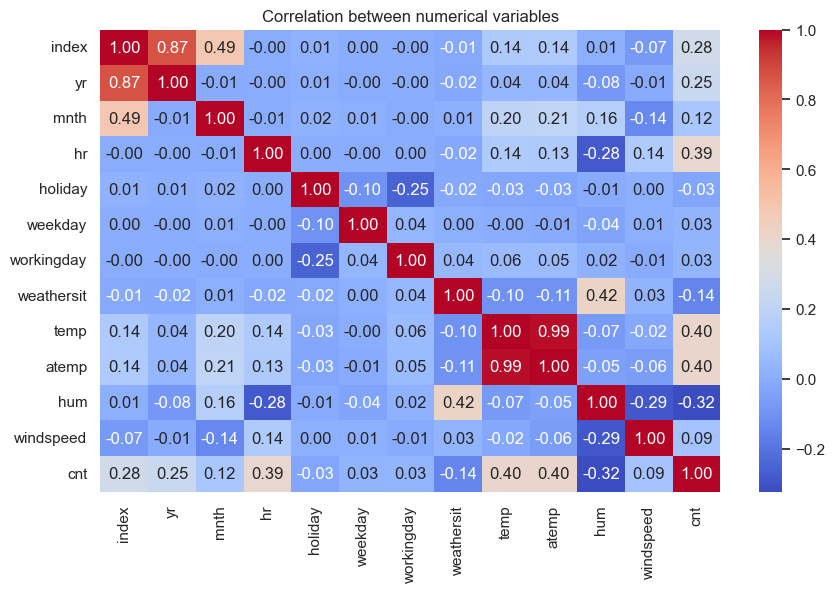

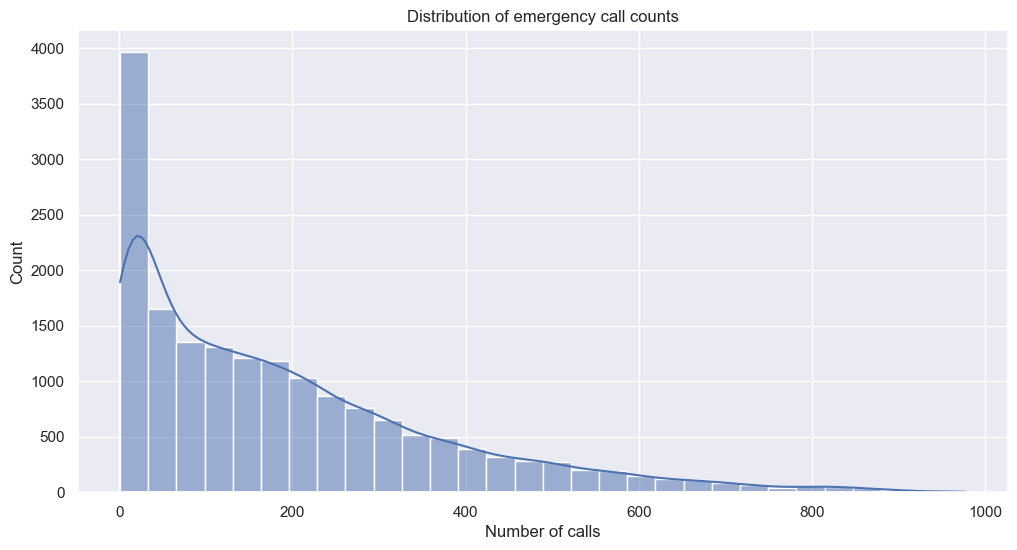

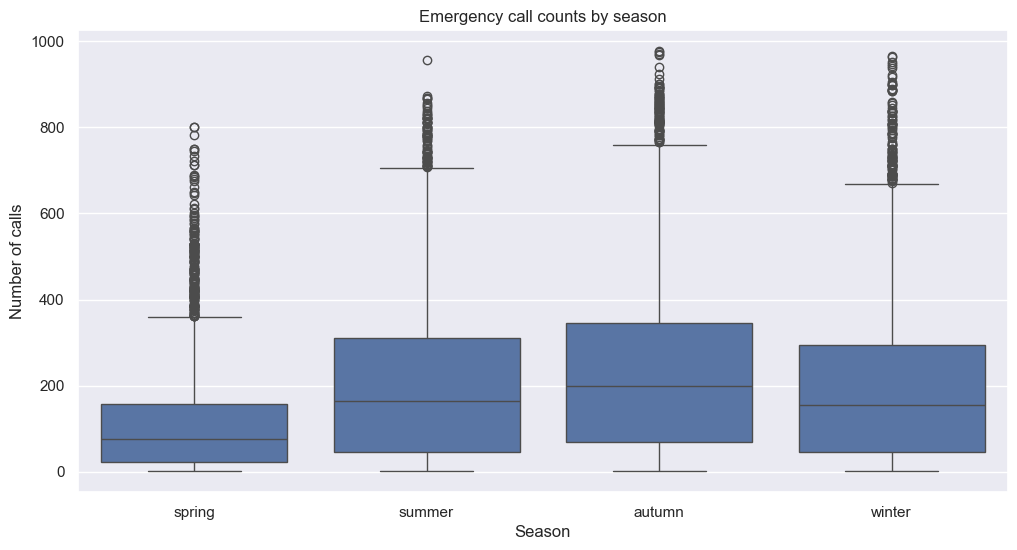

In [3]:
numeric_data = data.select_dtypes(include=['number'])  

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation between numerical variables')
plt.show()

sns.histplot(data['cnt'], bins=30, kde=True)
plt.title('Distribution of emergency call counts')
plt.xlabel('Number of calls')
plt.show()

sns.boxplot(x='season', y='cnt', data=data)
plt.title('Emergency call counts by season')
plt.xlabel('Season')
plt.ylabel('Number of calls')
plt.show()


In [13]:

X = pd.get_dummies(data[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']], drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))


Mean Squared Error: 1762.555774184863
R2 Score: 0.9443381374251844


In [14]:

data['predicted_cnt'] = model.predict(X)
data['residuals'] = data['cnt'] - data['predicted_cnt']

threshold = 3 * data['residuals'].std()
anomalies = data[np.abs(data['residuals']) > threshold]
print("Аномалії:")
print(anomalies)


Аномалії:
       index       date  season  yr  mnth  hr  holiday  weekday  workingday  \
1452    1453 2011-03-05  spring   0     3  19        0        6           0   
1720    1721 2011-03-17  spring   0     3   8        0        4           1   
1730    1731 2011-03-17  spring   0     3  18        0        4           1   
1767    1768 2011-03-19  spring   0     3   8        0        6           0   
1838    1839 2011-03-22  summer   0     3   8        0        2           1   
...      ...        ...     ...  ..   ...  ..      ...      ...         ...   
17077  17078 2012-12-19  winter   1    12   8        0        3           1   
17114  17115 2012-12-20  winter   1    12  21        0        4           1   
17115  17116 2012-12-20  winter   1    12  22        0        4           1   
17180  17181 2012-12-23  spring   1    12  15        0        0           0   
17221  17222 2012-12-25  spring   1    12  10        1        2           0   

       weathersit  temp   atemp   hum  wi

Формуючи незалежні змінні, я обрала ті, що впливають на кількість викликів швидкої допомоги (cnt). Це дозволило побудувати більш точну модель для прогнозування. Розділення даних на тренувальну та тестову вибірки забезпечило об’єктивну оцінку якості моделей.

Для аналізу я використала три моделі: Random Forest, Gradient Boosting і XGBoost. Кожна з них має свої переваги. Random Forest — це базовий і ефективний алгоритм, який показує гарні результати "з коробки". Gradient Boosting забезпечує вищу точність, але потребує більше часу для навчання. Найкращий результат продемонстрував XGBoost, що вирізняється точністю й оптимізацією.

Для візуалізації результатів я створила графік, який чітко показує, наскільки добре кожна з моделей прогнозує реальні значення.

Висновок:
Результати аналізу показують, що XGBoost є найкращим варіантом для цієї задачі завдяки високій точності. Однак Random Forest також можна використовувати, якщо потрібен швидкий і надійний результат без тривалого налаштування. Gradient Boosting є компромісним варіантом між швидкістю та точністю. Для покращення моделей у майбутньому варто провести додаткову оптимізацію гіперпараметрів.











